In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pictures_data = pd.read_csv("pictures_data.csv")
pictures_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,fe80::e2ce:c3ff:fe1a:1978,ff02::1,ICMPv6,174,Router Advertisement from e0:ce:c3:1a:19:78
1,2,0.014506,fe80::a8c:14f0:c17c:d903,ff02::16,ICMPv6,150,Multicast Listener Report Message v2
2,3,0.304433,140.82.113.26,192.168.1.12,TLSv1.2,91,Application Data
3,4,0.304697,192.168.1.12,140.82.113.26,TLSv1.2,95,Application Data
4,5,0.393250,2606:4700::6812:3a2,2a00:a041:3c5d:4d00:605e:f34d:a502:2044,TLSv1.2,125,Application Data


In [8]:
pictures_data['Protocol'].value_counts()

Protocol
TCP        2992
TLSv1.3    1165
TLSv1.2     274
ICMPv6       46
MDNS         27
SSDP         16
ARP          11
DNS          10
0x86dd       10
IGMPv2        2
IGMPv3        1
DHCP          1
Name: count, dtype: int64

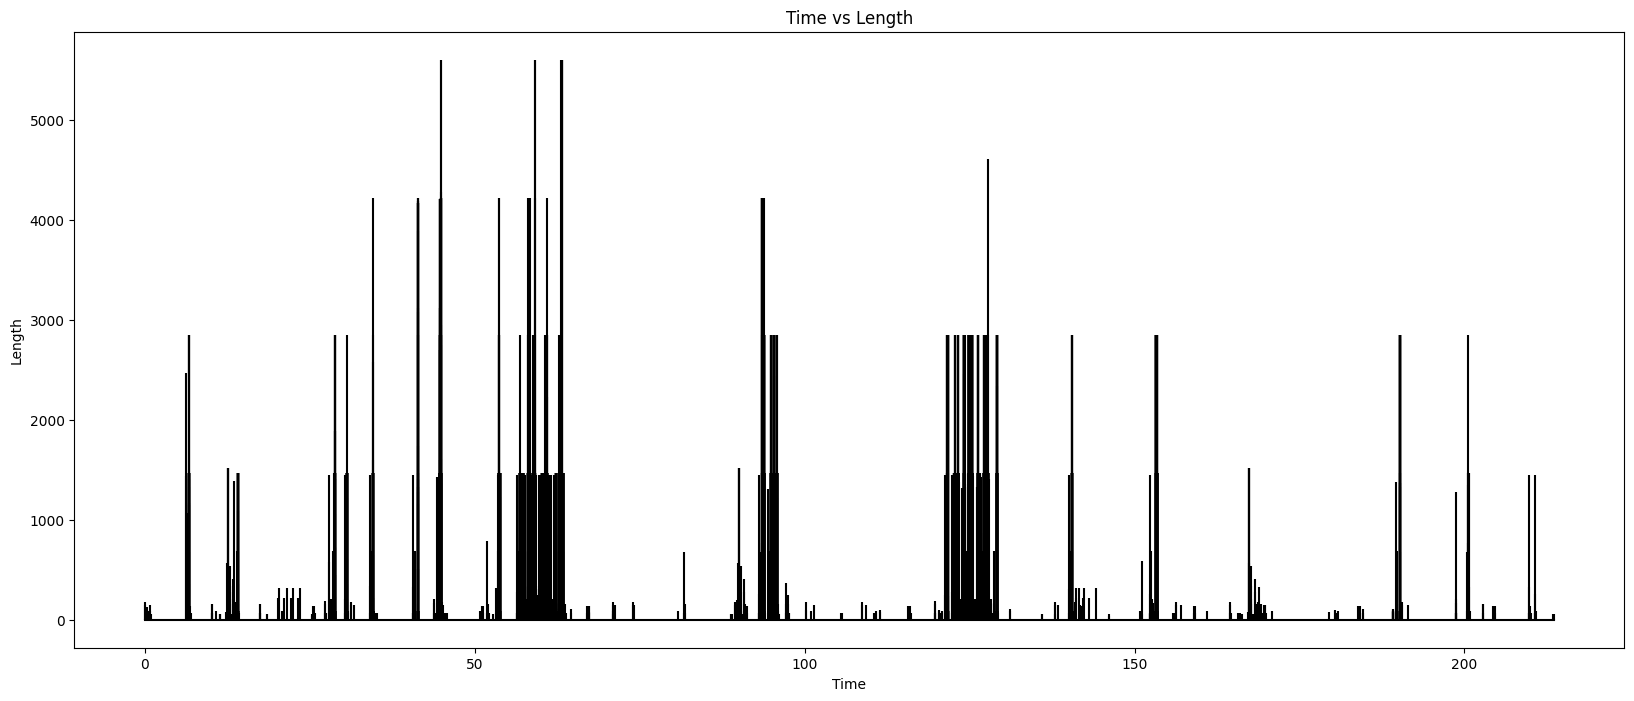

In [5]:
time = pictures_data['Time']
len = pictures_data['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')

plt.show()

In [11]:
video_data = pd.read_csv("video_data.csv")
video_data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000e+00,192.168.1.18,224.0.0.251,MDNS,101,Standard query 0x0000 SRV Roku 3 1GJ37V01468...
1,2,4.520000e-07,192.168.1.18,224.0.0.251,MDNS,182,"Standard query response 0x0000 SRV, cache flus..."
2,3,6.756179e+00,192.168.1.10,224.0.0.251,MDNS,91,"Standard query 0x0000 PTR _raop._tcp.local, ""Q..."
3,4,8.029800e+00,192.168.1.12,157.240.221.60,TLSv1.2,135,Application Data
4,5,8.109785e+00,157.240.221.60,192.168.1.12,TCP,66,443 > 45474 [ACK] Seq=1 Ack=70 Win=325 Len=0...


In [13]:
video_data['Protocol'].value_counts()

Protocol
TCP        287
TLSv1.2    126
ICMPv6      48
TLSv1.3     42
MDNS        25
DNS         24
SSDP        16
ARP          6
HTTP         3
DHCP         2
IGMPv2       2
IGMPv3       1
0x86dd       1
Name: count, dtype: int64

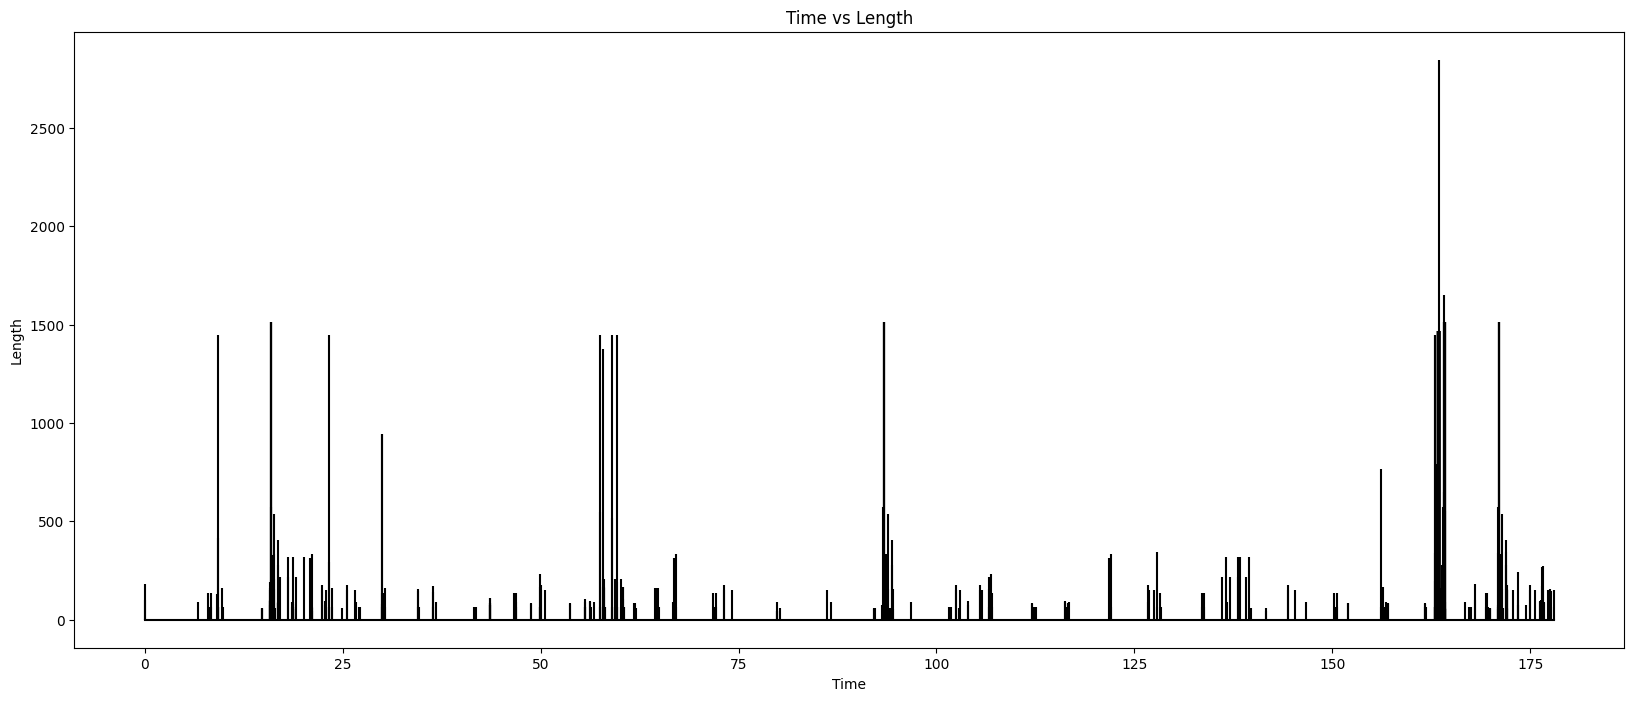

In [12]:
time = video_data['Time']
len = video_data['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()

In [19]:
text_data = pd.read_csv("text_data.csv")
text_data.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 134176: invalid continuation byte

In [ ]:
video_data['Protocol'].value_counts()

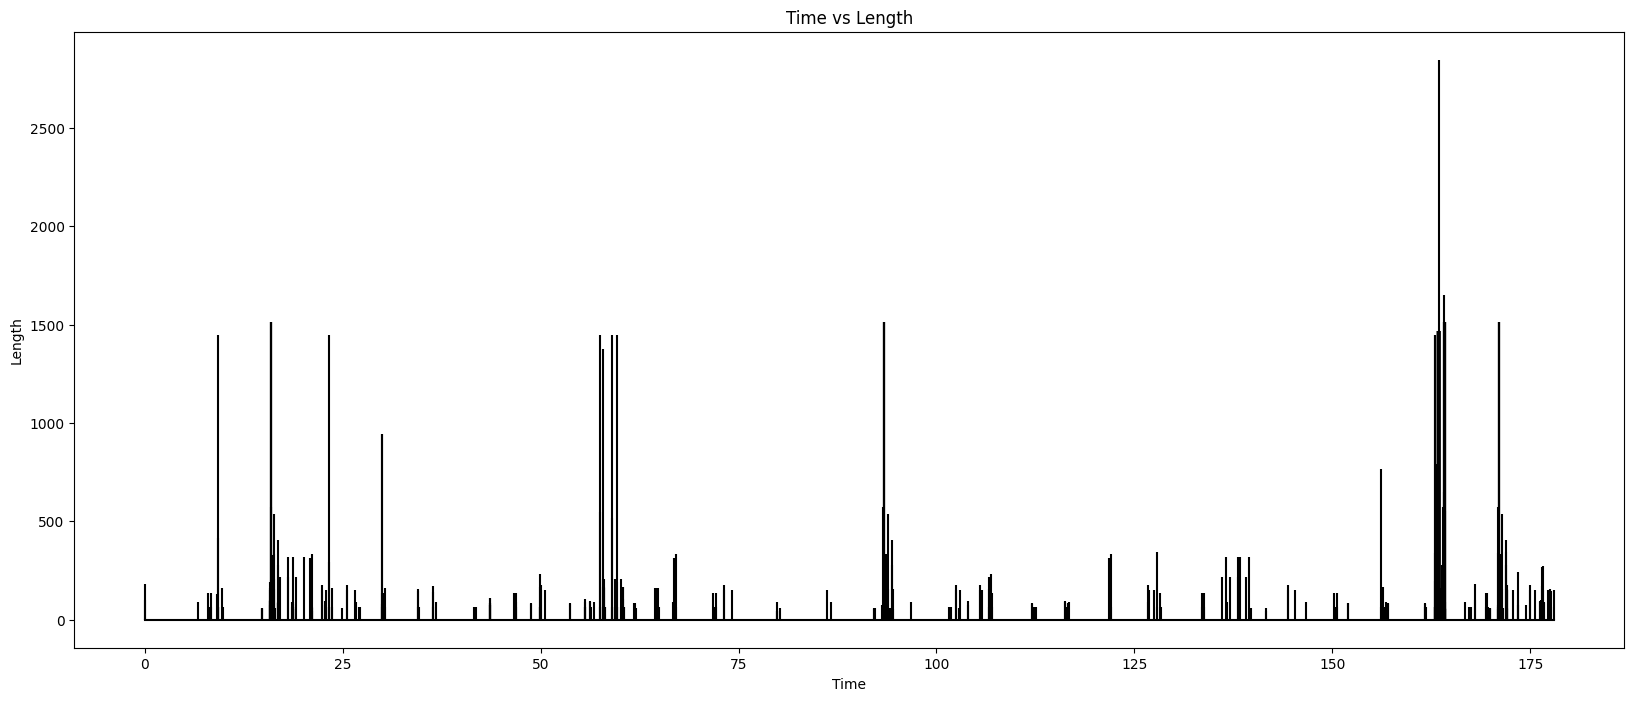

In [15]:
time = video_data['Time']
len = video_data['Length']
plt.figure(figsize=(20,8)) 
plt.stem(time, len,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Time vs Length')
plt.show()